In [ ]:
import pandas

data = pandas.read_csv("../localdata/Clean_Quasar_Data.csv")

X = data[['PSFFLUX_0_LUMINOSITY', 'PSFFLUX_1_LUMINOSITY', 'PSFFLUX_2_LUMINOSITY', 'PSFFLUX_3_LUMINOSITY', 'PSFFLUX_4_LUMINOSITY',
          'FUV_LUMINOSITY', 'NUV_LUMINOSITY',
          'YFLUX_LUMINOSITY', 'JFLUX_LUMINOSITY', 'HFLUX_LUMINOSITY', 'KFLUX_LUMINOSITY',
          'W1_FLUX_LUMINOSITY', 'W2_FLUX_LUMINOSITY',
          'FIRST_FLUX_LUMINOSITY',
          'XMM_SOFT_FLUX_LUMINOSITY','XMM_HARD_FLUX_LUMINOSITY',
          'GAIA_G_FLUX_SNR_LUMINOSITY', 'GAIA_BP_FLUX_SNR_LUMINOSITY', 'GAIA_RP_FLUX_SNR_LUMINOSITY']]

y = data['BAL_PROB']

print(data.shape)
print(X.shape)
print(y.shape)
print(y.value_counts())

(336523, 44)
(336523, 19)
(336523,)
BAL_PROB
Non-BAL    313425
BAL         23098
Name: count, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Drops rows with NaN values from both X and y to maintain consistency
data = pandas.concat([X, y], axis=1).dropna()
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]

# Splits data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Align indices of y_train with X_train
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Trains the model
ab_model = AdaBoostClassifier(n_estimators=100, random_state=365)
ab_model.fit(X_train, y_train)

c:\Users\james\miniconda3\envs\quasars\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=365)

In [5]:
## PREDICT AND EVALUATE ON TEST SET
# Uses test set to create predictions
test_predictions = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print(f'Confusion Matrix:\n{test_conf_matrix}')

# Detailed Classification Report
test_class_report = classification_report(y_test, test_predictions)
print(f'Classification Report:\n{test_class_report}')

# Feature Importances
feature_importances = ab_model.feature_importances_

importance_df = pandas.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

Test Accuracy: 0.9328
Confusion Matrix:
[[  300  2953]
 [  279 44531]]
Classification Report:
              precision    recall  f1-score   support

         BAL       0.52      0.09      0.16      3253
     Non-BAL       0.94      0.99      0.96     44810

    accuracy                           0.93     48063
   macro avg       0.73      0.54      0.56     48063
weighted avg       0.91      0.93      0.91     48063

Feature Importances:
                         Feature  Importance
12           W2_FLUX_LUMINOSITY        0.18
0          PSFFLUX_0_LUMINOSITY        0.14
2          PSFFLUX_2_LUMINOSITY        0.09
4          PSFFLUX_4_LUMINOSITY        0.09
3          PSFFLUX_3_LUMINOSITY        0.08
1          PSFFLUX_1_LUMINOSITY        0.07
6                NUV_LUMINOSITY        0.05
11           W1_FLUX_LUMINOSITY        0.05
13        FIRST_FLUX_LUMINOSITY        0.05
14     XMM_SOFT_FLUX_LUMINOSITY        0.04
8              JFLUX_LUMINOSITY        0.03
10             KFLUX_LUMINOSI

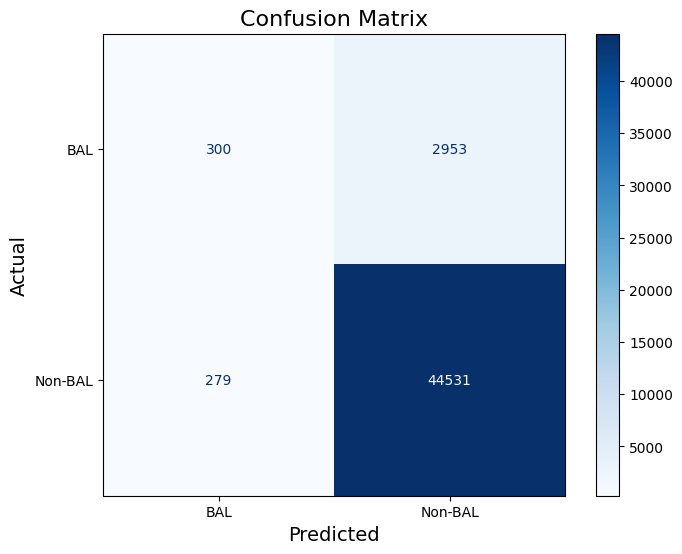

C:\Users\james\AppData\Local\Temp\ipykernel_29276\267729992.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(


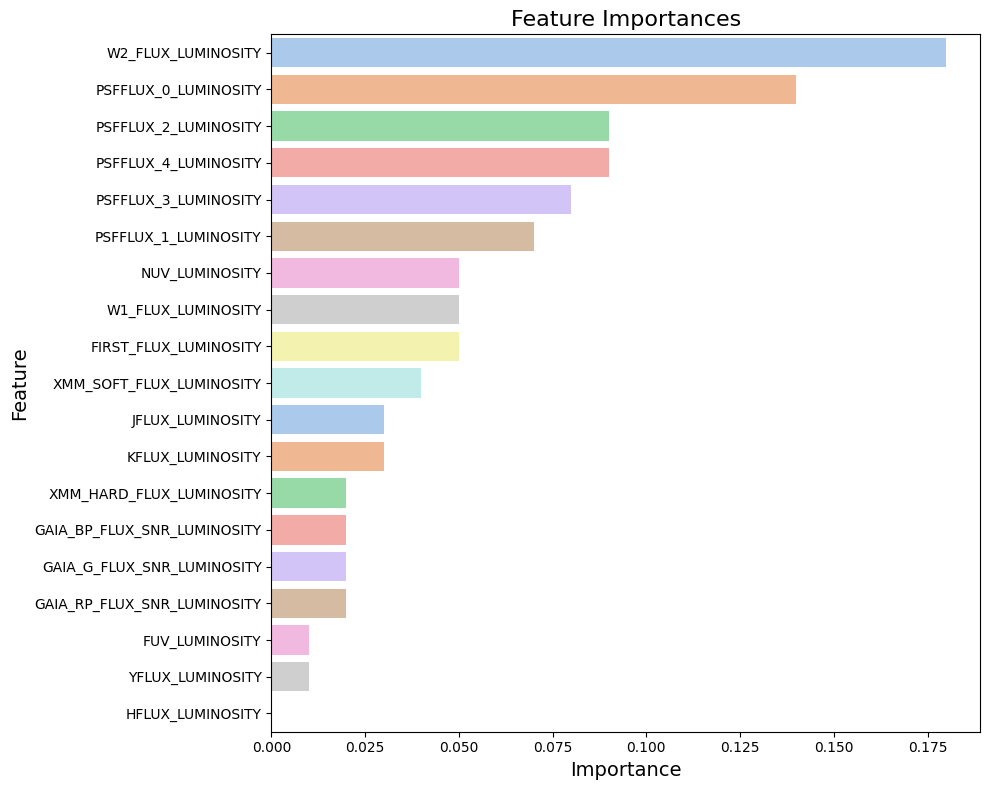

In [6]:
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import ConfusionMatrixDisplay

# CONFUSION MATRIX VISUALIZATION
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    test_predictions,
    cmap="Blues",
    ax=ax,
    colorbar=True
)
ax.set_title("Confusion Matrix", fontsize=16)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
plt.show()

# FEATURE IMPORTANCES VISUALIZATION
plt.figure(figsize=(10, 8))
sorted_importance_df = importance_df.head(19)
seaborn.barplot(
    x="Importance", 
    y="Feature", 
    data=sorted_importance_df,
    palette="pastel"
)
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()

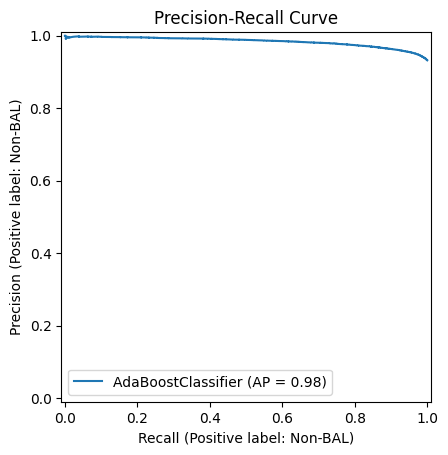

In [7]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(ab_model, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

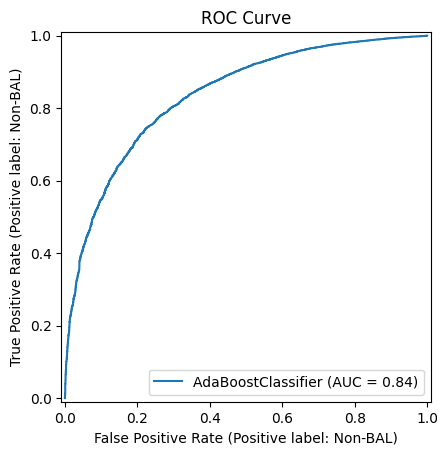

In [8]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(ab_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

In [ ]:
# What % of BALs come from WISE rather than other telescopes?
# Be skeptical - why is the W2 flux so different? 
# What in the data might give it that difference that ISN'T actually related to the quasar

# Visualization of how much data comes from each source
# Visualization of what % of each source is a BAL

# Create a model (new file probably to be less confusing) for just PSF FLUX
# and maybe just W1 and W2

# Change outlier proportions in preprocessing

# Possibly only use a subset of quasars with high signal-to-noise ratios/low errors

# Check which observatories have a high signal-to-noise/error ratio before and after 
# filtering for a certain rate

# Could get rid of low luminosity galaxies as well (i'm not totally sure if this would work)
# X-rays are least contaminated by host galaxies
# Visual and near-infrared are most contaminated by host galaxies


# A model for BAL quasars that has been presented is that they are over-feeding regular quasars
# Accreding at a high rate, has to emit a lot of radiation to compensate
# Mid-infrared is created by dust that is heating up

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Try with a small random subset 

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

# Train a model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_poly, y_train)

test_predictions = rf_model.predict(X_test_poly)

# Accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print(f'Confusion Matrix:\n{test_conf_matrix}')

# Detailed Classification Report
test_class_report = classification_report(y_test, test_predictions)
print(f'Classification Report:\n{test_class_report}')

# Feature Importances
feature_importances = rf_model.feature_importances_

importance_df = pandas.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)
